# **1. Install packages**

In [1]:
%%capture
!pip install catboost skimpy

  Using cached catboost-1.2.8-cp312-cp312-win_amd64.whl.metadata (1.5 kB)
  Using cached skimpy-0.0.18-py3-none-any.whl.metadata (34 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.3.0-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached pandas_stubs-2.2.3.250527-py3-none-any.whl.metadata (10 kB)
  Using cached polars-1.31.0-cp39-abi3-win_amd64.whl.metadata (15 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached typeguard-4.4.4-py3-none-any.whl.metadata (3.3 kB)
  Using cached pyarrow-20.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached types_pytz-2025.2.0.2025051

# **2. Load libraries**

In [1]:
# Data manipulation
#====================================================
import pandas as pd
import numpy as np

# Data visualization
#====================================================
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

# Stats
#====================================================
#%pip install --upgrade scipy statsmodels
import statsmodels.api as sm

# Data preprocessing
#====================================================
#%pip install scikit-learn
from sklearn.model_selection import train_test_split as tts

# Models
#====================================================
#%pip install xgboost lightgbm catboost
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Metrics
#=====================================================
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix)

# warnings
#=====================================================
import warnings
warnings.filterwarnings("ignore")

# tqdm
#====================================================
#%pip install tqdm
from tqdm.auto import tqdm

In [3]:
import sys
try:
    import scipy
    scipy_version = scipy.__version__
except ImportError:
    scipy_version = "Not installed"

try:
    import statsmodels
    statsmodels_version = statsmodels.__version__
except ImportError:
    statsmodels_version = "Not installed"

print(f"Python version: {sys.version}")
print(f"SciPy version: {scipy_version}")
print(f"Statsmodels version: {statsmodels_version}")

Python version: 3.12.11 | packaged by Anaconda, Inc. | (main, Jun  5 2025, 12:58:53) [MSC v.1929 64 bit (AMD64)]
SciPy version: 1.15.3
Statsmodels version: 0.14.4


In [4]:
import statsmodels.api as sm
print("Statsmodels imported successfully!")

Statsmodels imported successfully!


# **3. Load data**

In [6]:
data = pd.read_csv("C:/Users/asus/OneDrive/Desktop/projectfinal2025/data_stress.csv")
data.head()

,snoring range,respiration rate,body temperature,limb movement,blood oxygen,eye movement,hours of sleep,heart rate,Stress Levels
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# **4. EDA**

In [7]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 630    │ │ float64     │ 8     │                                                          │
│ │ Number of columns │ 9      │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column            ┃ NA  ┃ NA %               ┃ mean  ┃ sd    ┃ p0 ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ snoring range     │   0 │                  0 │  71.6 │ 19.37 │ 45 │  52.5 │    70 │ 91.25 │   100 │ ▇▅▃▃▃▇ │  │
│ │ respiration rate  │   0 │                  0 │ 21.92 │ 4.336 │ 16 │  18.5 │ 21.02 │ 25.06 │ 48.56 │  ▇▅▂   │  │
│ │ body temperature  │  16 │ 2.5396825396825395 │ 93.47 │ 6.833 │ 85 │ 90.58 │ 93.08 │  95.6 │ 166.2 │   ▇    │  │
│ │ limb movement     │  12 │ 1.9047619047619047 │ 11.95 │ 5.001 │  4 │ 8.516 │ 11.05 │ 15.95 │  46.8 │  ▇▆▁   │  │
│ │ blood oxygen      │   4 │ 0.6349206349206349 │ 91.05 │ 4.892 │ 82 │ 88.48 │    91 │ 94.27 │ 154.3 │   ▇▃   │  │
│ │ eye movement      │  18 │  2.857142857142857 │ 88.96 │ 13.48 │ 60 │ 81.23 │ 90.08 │ 98.89 │ 185.4 │  ▃▇▂   │  │
│ │ hours of sleep    │  11 │  1.746031746031746 │ 3.836 │ 3.341 │  0 │ 0.472 │ 3.608 │ 6.592 │ 20.22 │  ▇▅▃   │  │
│ │ heart rate        │  24 │ 3.8095238095238093 │  64.9 │ 11.26 │ 50 │ 56.21 │ 62.54 │ 72.74 │ 158.7 │   ▇▅   │  │
│ │ Stress Levels     │   0 │                  0 │     2 │ 1.415 │  0 │     1 │     2 │     3 │     4 │ ▇▇ ▇▇▇ │  │
│ └───────────────────┴─────┴────────────────────┴───────┴───────┴────┴───────┴───────┴───────┴───────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
data.columns = data.columns.str.strip()
data.columns = data.columns.str.replace(" ", "_")
data.columns

Index(['snoring_range', 'respiration_rate', 'body_temperature',
       'limb_movement', 'blood_oxygen', 'eye_movement', 'hours_of_sleep',
       'heart_rate', 'Stress_Levels'],
      dtype='object')

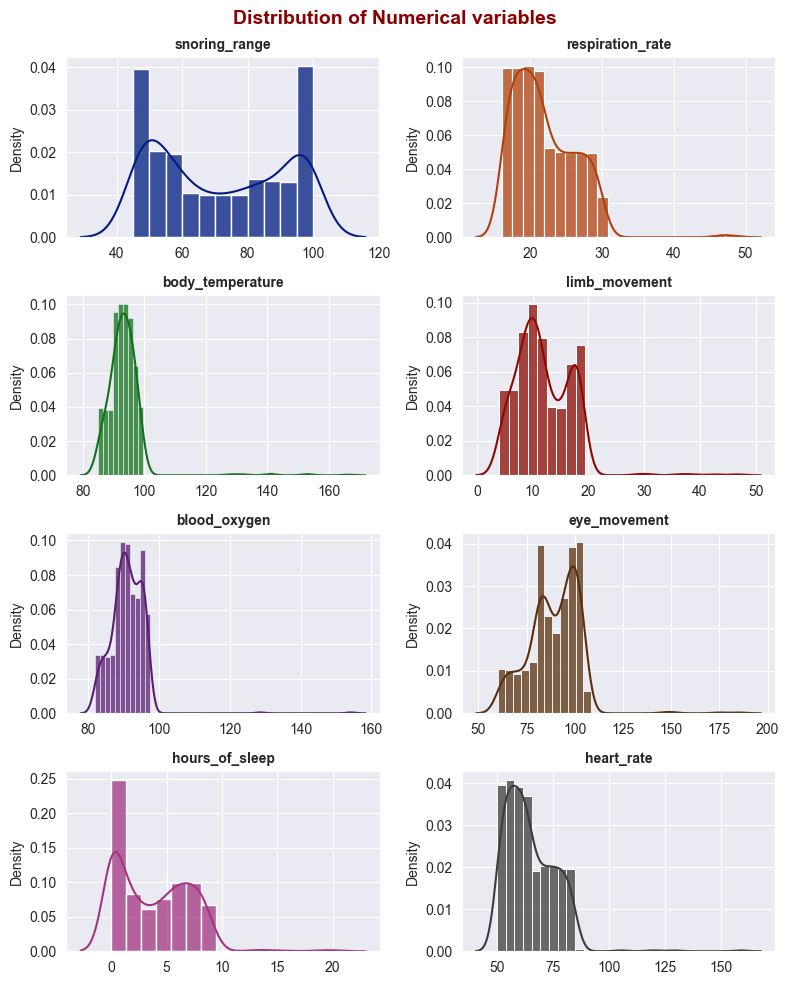

In [9]:
sns.set_style("darkgrid")
numerical_features = data.columns[:-1]
colors = sns.color_palette(n_colors = len(numerical_features), palette = 'dark')

fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (8, 10))
axs = axs.flat

for i,feature in enumerate(numerical_features):
    sns.histplot(data = data, x = feature, stat = 'density', ax = axs[i], color = colors[i])
    sns.kdeplot(data = data, x = feature, ax = axs[i], color = colors[i])
    axs[i].set_title(f'{feature}', fontsize = 10, fontweight = 'bold')
    axs[i].set_xlabel("")
fig.suptitle("Distribution of Numerical variables", fontsize = 14, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.show()

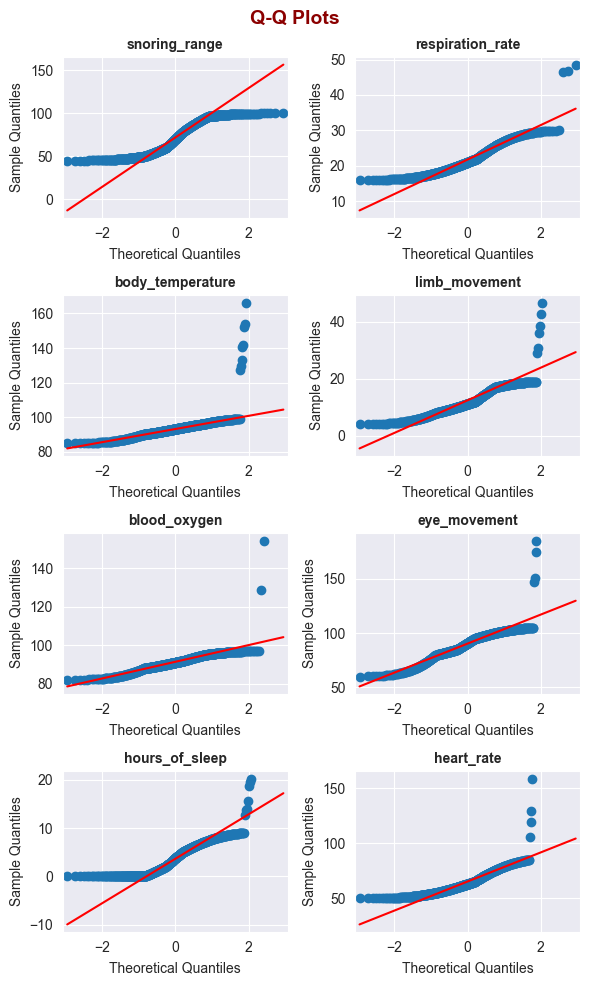

In [10]:
numerical_features = data.columns[:-1]
colors = sns.color_palette(n_colors = len(numerical_features), palette = 'dark')

fig,axs = plt.subplots(nrows = 4, ncols = 2, figsize = (6, 10))
axs = axs.flat

for i,feature in enumerate(numerical_features):
    sm.qqplot(data[feature], ax = axs[i], line = 'q')
    axs[i].set_title(f'{feature}', fontsize = 10, fontweight = 'bold')
    
fig.suptitle("Q-Q Plots", fontsize = 14, fontweight = 'bold', color = 'darkred')
fig.tight_layout()
fig.show()

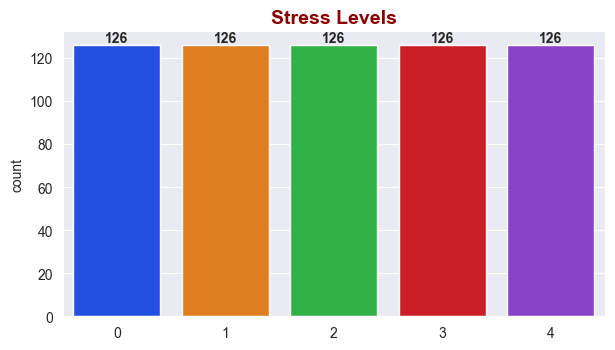

In [11]:
fig,ax = plt.subplots(figsize = (7,3.7))
ax = sns.countplot(data, x = 'Stress_Levels', palette = 'bright')

for bars in ax.containers:
    ax.bar_label(bars, fontsize = 10, fontweight = 'bold')
    
ax.set_xlabel('')
ax.set_title('Stress Levels', fontsize = 14, fontweight = 'bold', color = 'darkred')
fig.show()

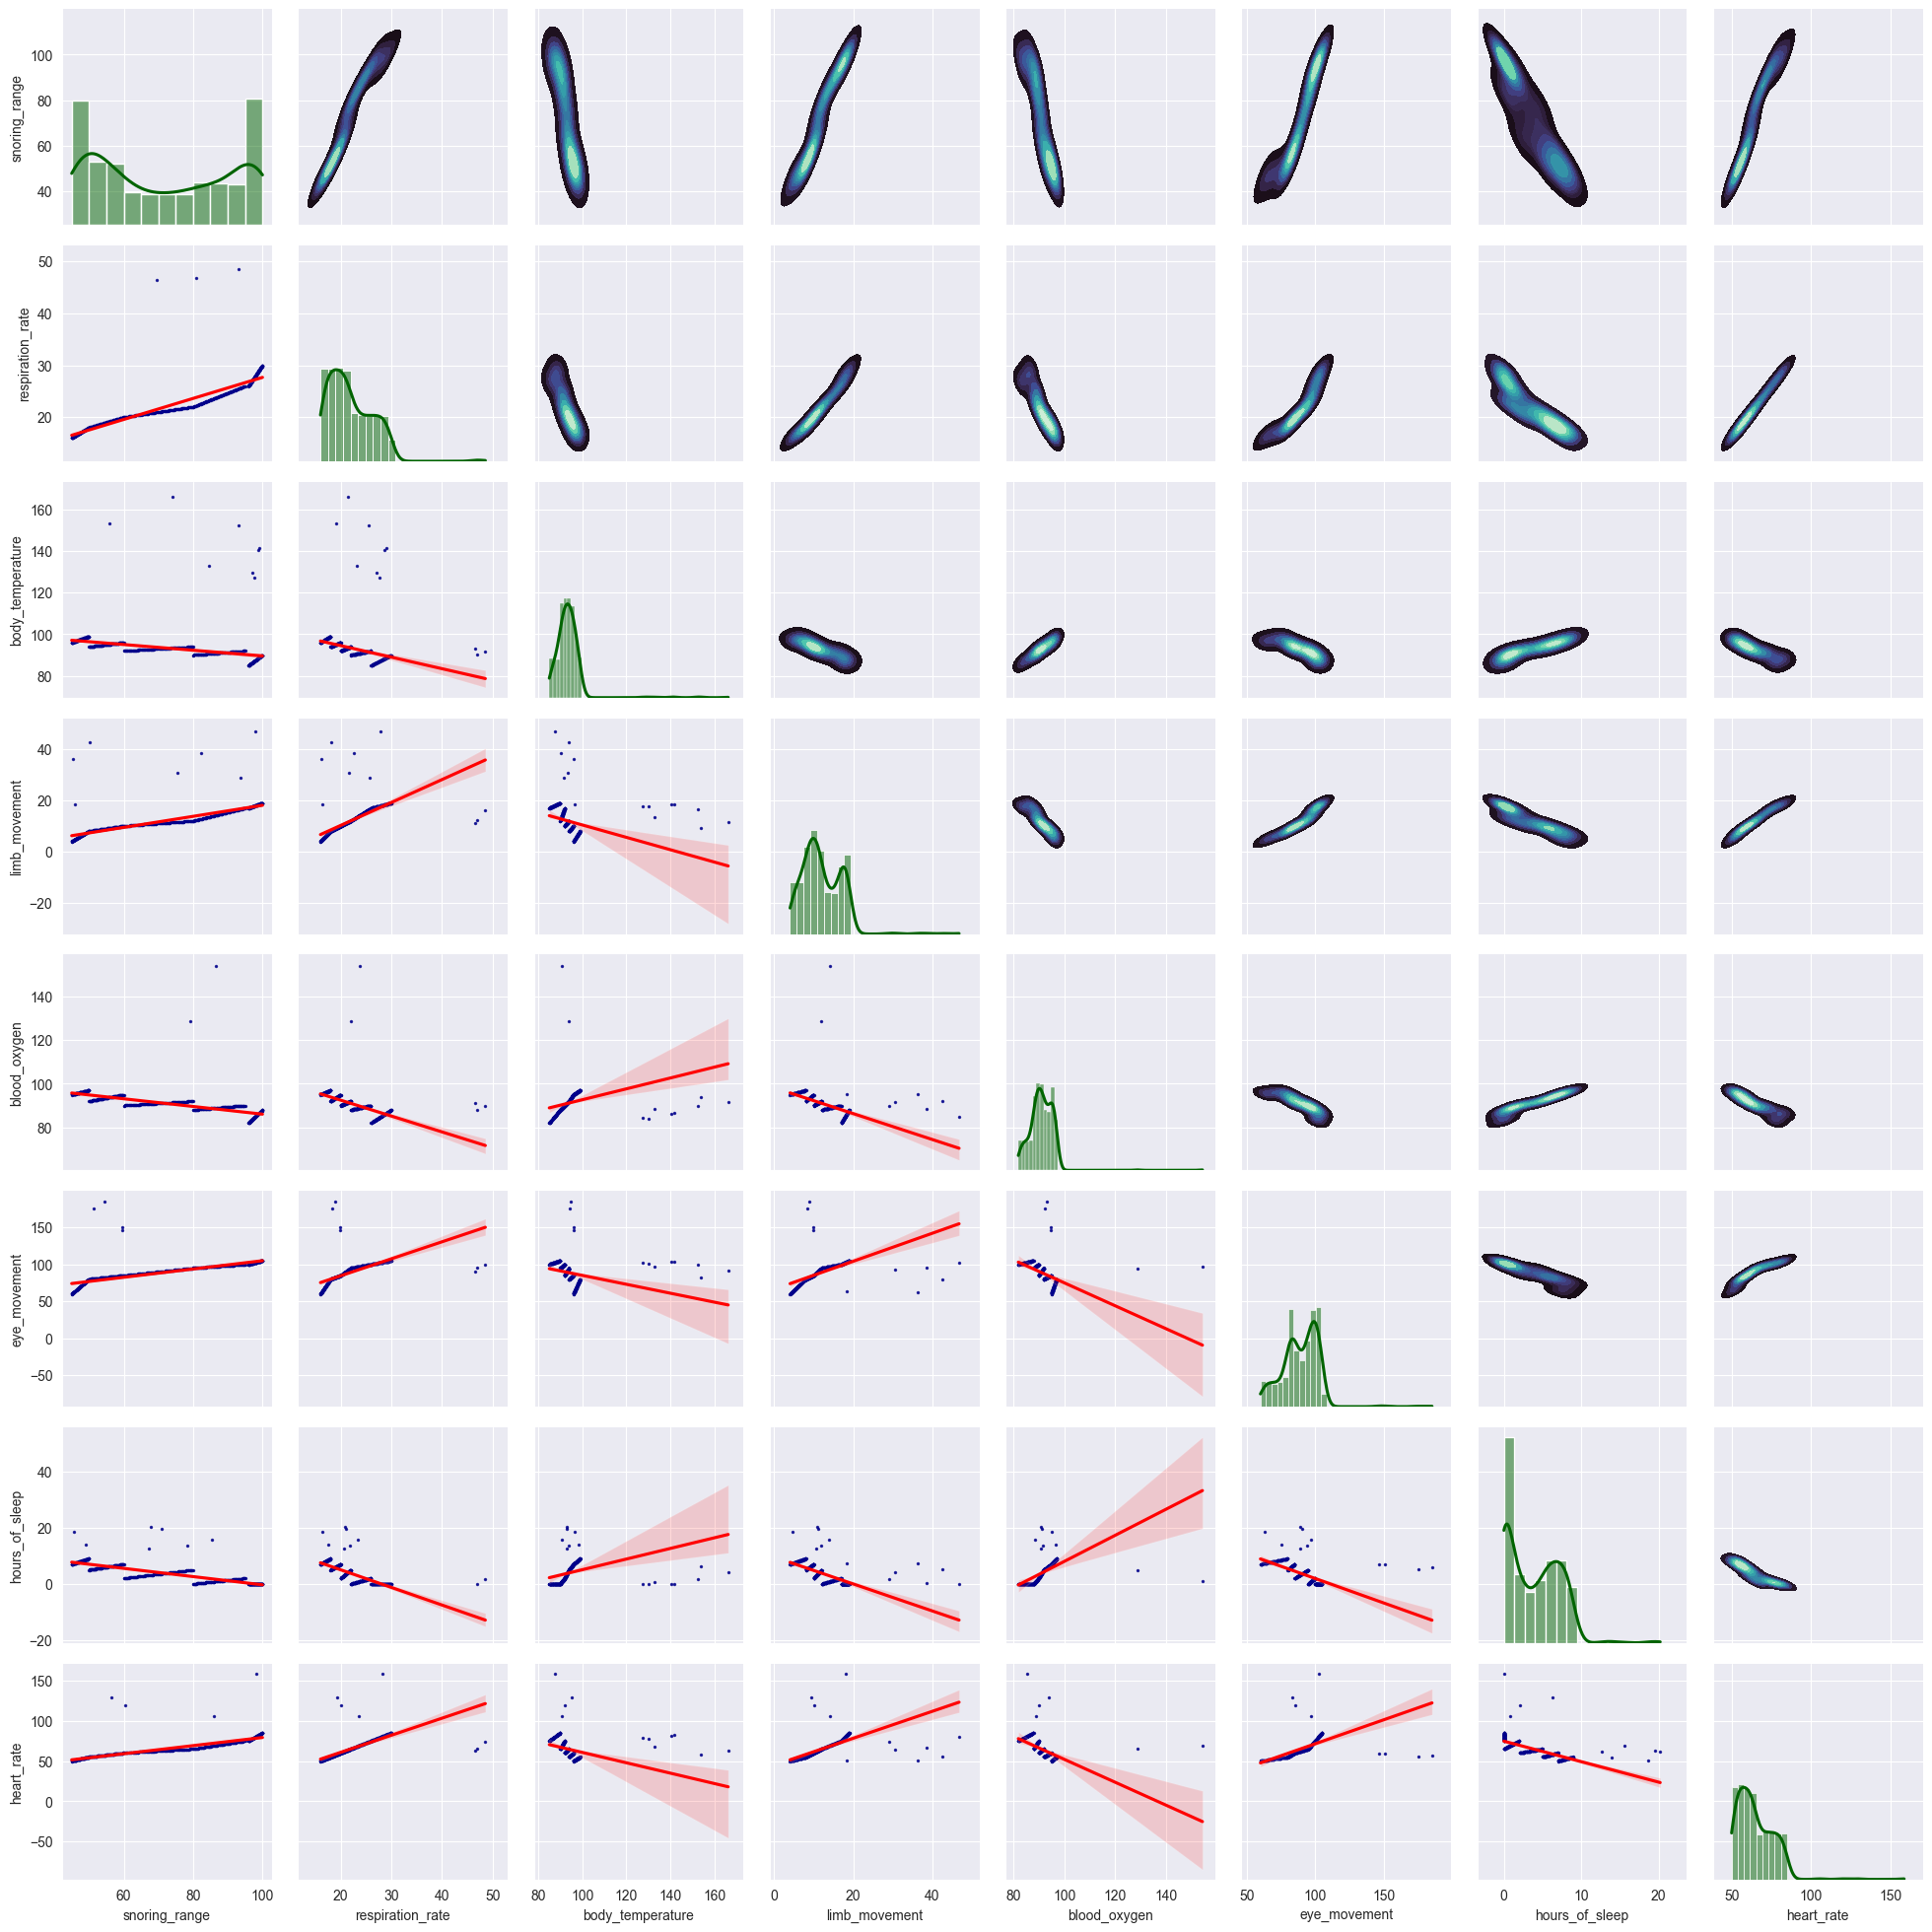

In [12]:
g = sns.PairGrid(data[numerical_features], 
                 palette = 'dark')
g.map_lower(sns.regplot, 
            scatter_kws = {'s':2, 
                           'color':'darkblue'}, 
            line_kws = {'color':'red'})
g.map_diag(sns.histplot, kde = True, line_kws = {'linewidth':2.2}, color = 'darkgreen')
g.map_upper(sns.kdeplot, fill = True, cmap = 'mako')
g.fig.show()

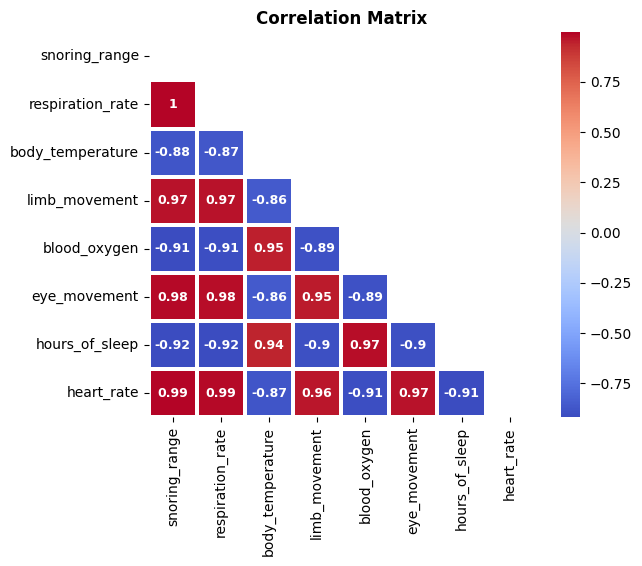

In [13]:
plt.style.use('default')
corr_matrix = data[numerical_features].corr(method = 'spearman')
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))

fig,ax = plt.subplots(figsize = (7,5))
sns.heatmap(corr_matrix, annot = True, 
            annot_kws = {'fontsize':9, 'fontweight':'bold'}, 
            square = True, 
            mask = mask, 
            cmap = 'coolwarm',
            linewidths = 1.5,
            ax = ax)
ax.set_title("Correlation Matrix", fontsize = 12, fontweight = 'bold', color = 'black')
fig.show()

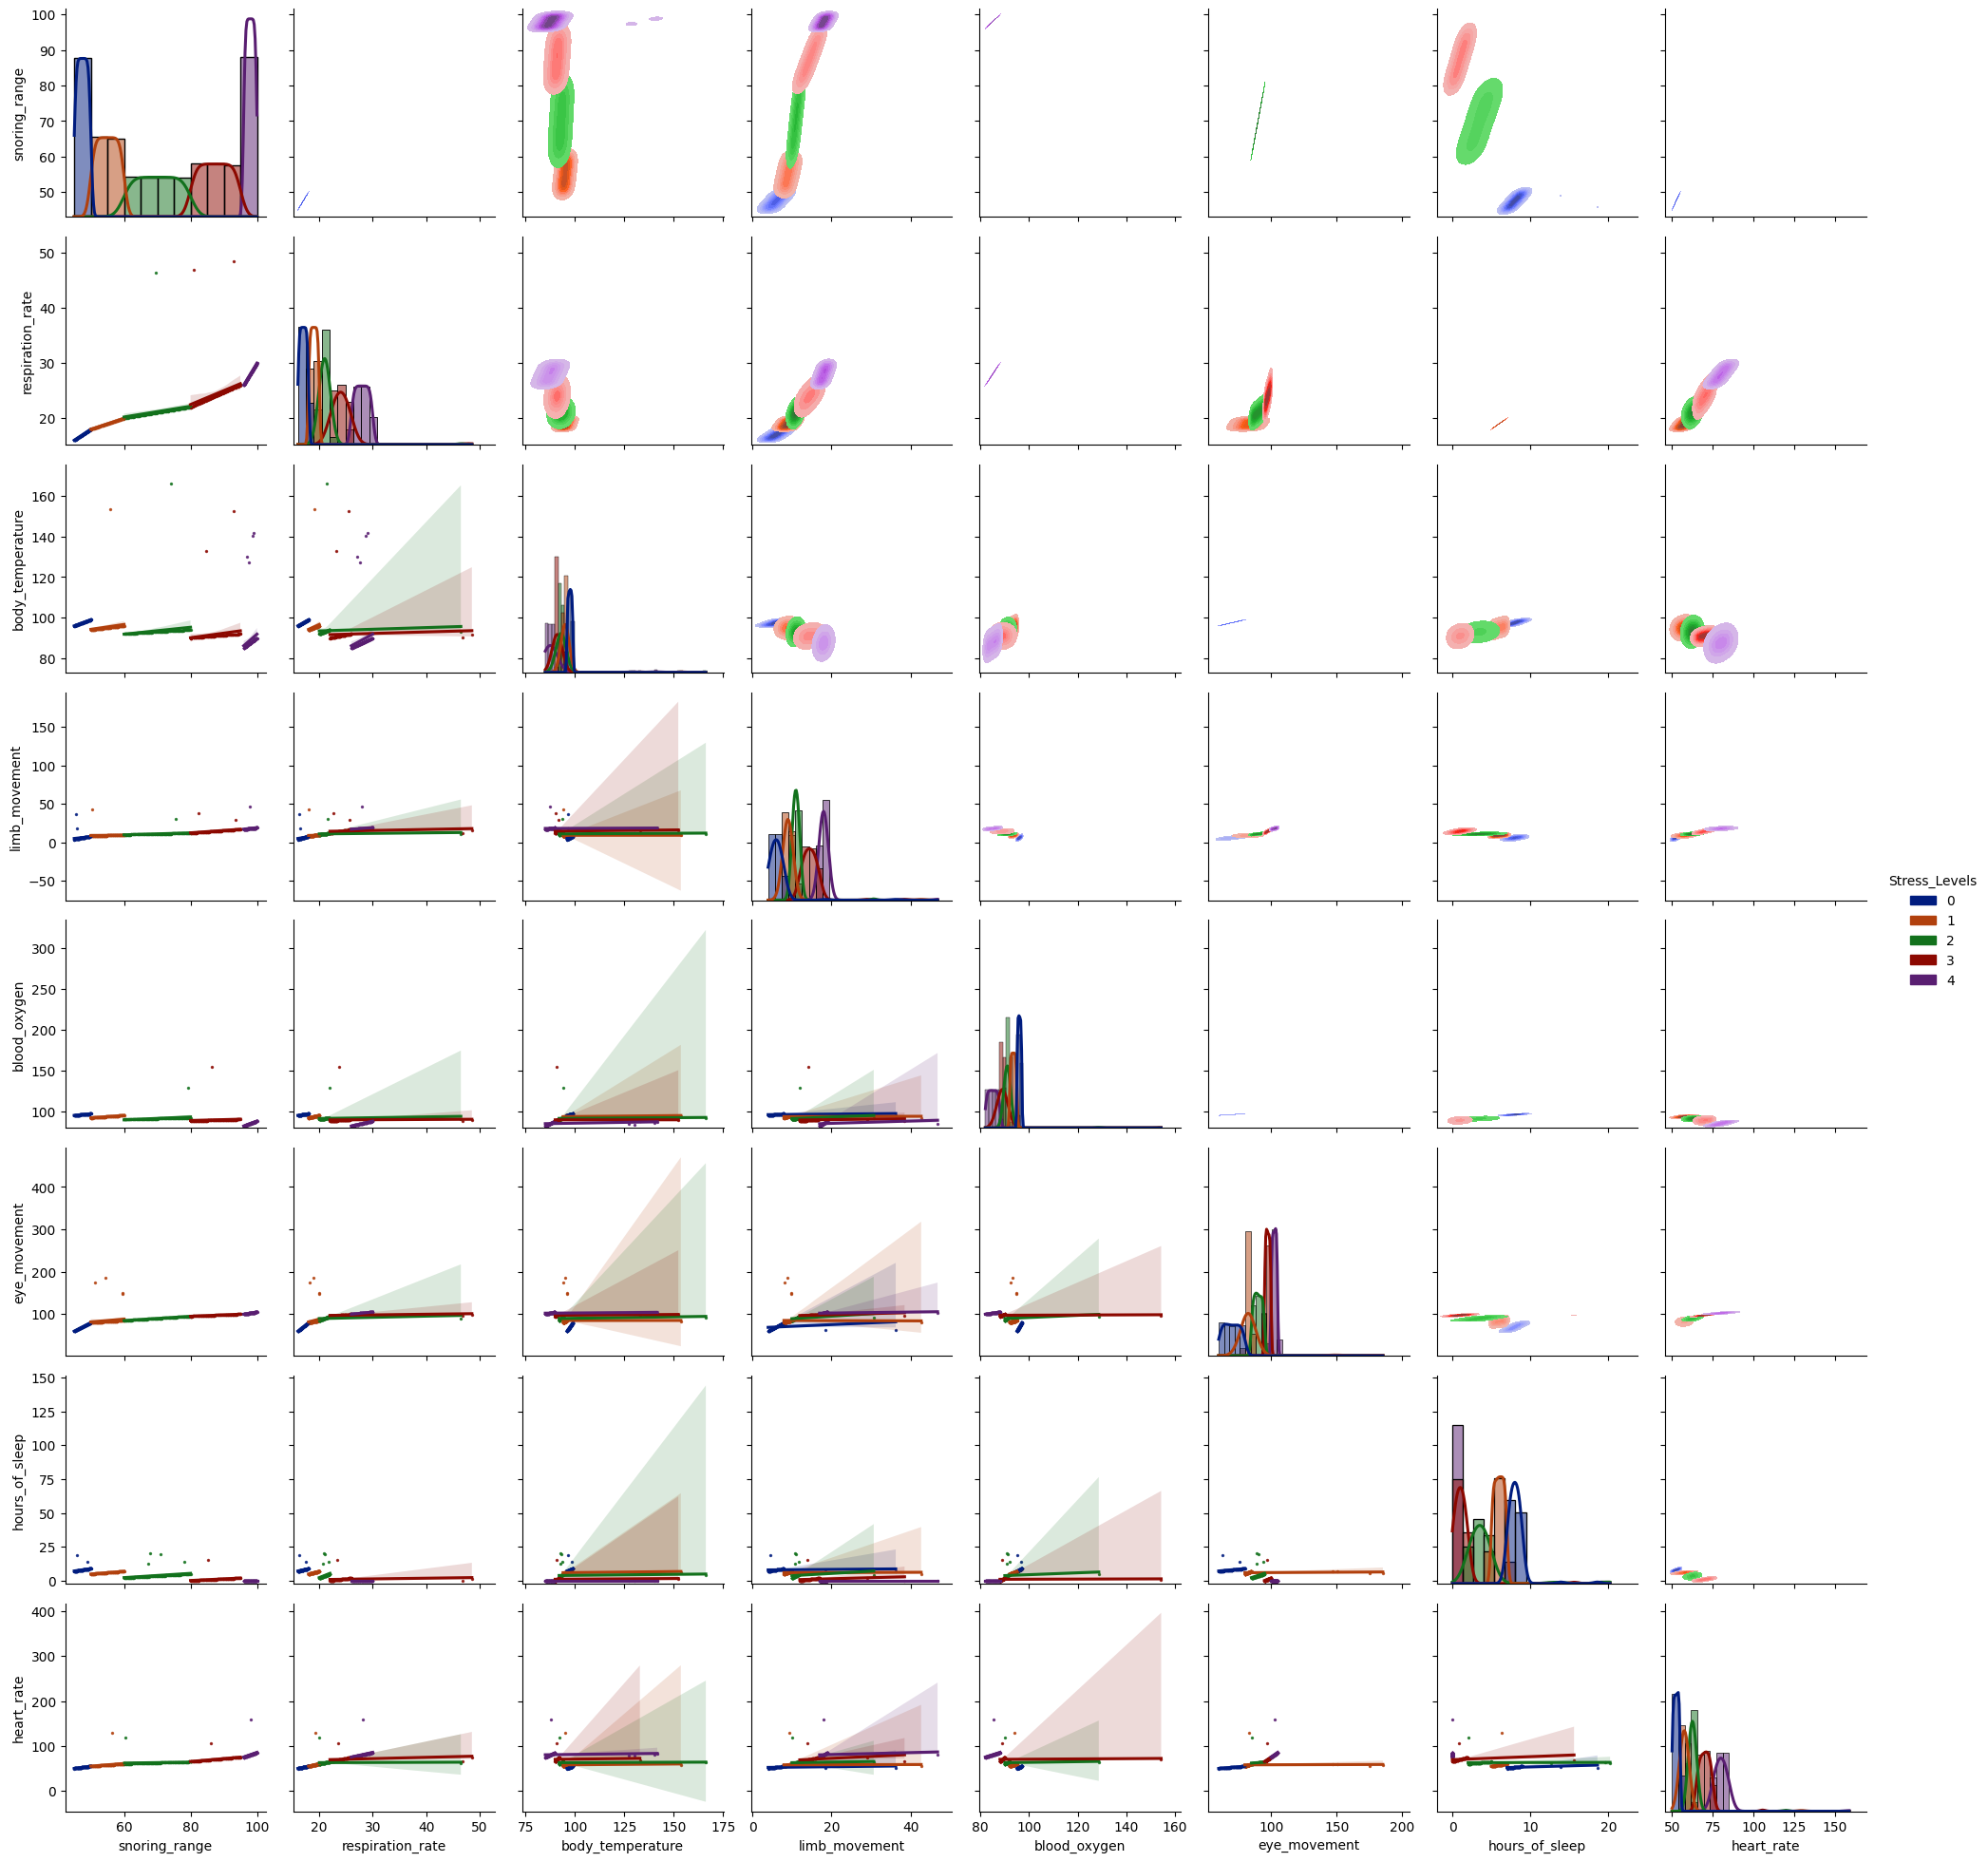

In [14]:
g = sns.PairGrid(data, hue = 'Stress_Levels', 
                 palette = 'dark')
g.map_lower(sns.regplot, 
            scatter_kws = {'s':2})
g.map_diag(sns.histplot, kde = True, line_kws = {'linewidth':2.2})
g.map_upper(sns.kdeplot, fill = True)
g.add_legend()
g.fig.show()

# **5. Data preprocessing**

In [15]:
X = data.drop(columns = 'Stress_Levels')
y = data['Stress_Levels']

SEED = 123

X_train, X_test, y_train, y_test = tts(X, 
                                       y, 
                                       test_size = 0.2, 
                                       random_state = SEED, 
                                       shuffle = True)

# **6. Models**

In [16]:
xgb = XGBClassifier(random_state = SEED, n_jobs = -1)
lgbm = LGBMClassifier(random_state = SEED, n_jobs = -1, verbosity = -1)
cb = CatBoostClassifier(random_state = SEED, verbose = 0)

MODELS = [xgb, lgbm, cb]

In [17]:
for model in tqdm(MODELS):
    name = type(model).__name__
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    score_train = accuracy_score(y_train, pred_train)
    score_test = accuracy_score(y_test, pred_test)
    
    print(f'* {name} =====> Acc Train: {score_train:.4f} | Acc Test: {score_test:.4f}\n')

 33%|███▎      | 1/3 [00:01<00:03,  1.92s/it]

* XGBClassifier =====> Acc Train: 1.0000 | Acc Test: 0.9921



 67%|██████▋   | 2/3 [00:02<00:01,  1.14s/it]

* LGBMClassifier =====> Acc Train: 1.0000 | Acc Test: 0.9603



100%|██████████| 3/3 [00:15<00:00,  5.23s/it]

* CatBoostClassifier =====> Acc Train: 1.0000 | Acc Test: 1.0000



The winning model was CatBoostClassifier, so on this model we will calculate the confusion matrices.

# **7. Metrics**

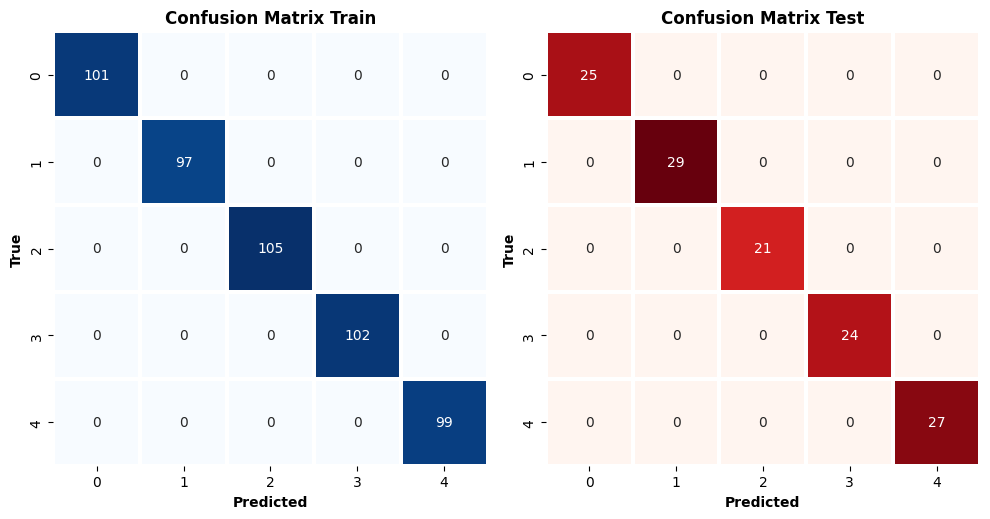

In [18]:
model = CatBoostClassifier(random_state = SEED, verbose = 0)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

cf_mx_train = confusion_matrix(y_train, y_pred_train)
cf_mx_test = confusion_matrix(y_test, y_pred_test)

fig,axs = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
axs = axs.flat

sns.heatmap(cf_mx_train, fmt = '', annot = True, linewidths = 1.5,  cmap = 'Blues', square = True, cbar = False, ax = axs[0])
axs[0].set_title("Confusion Matrix Train", fontsize = 12, fontweight = 'bold', color = 'black')
axs[0].set_xlabel("Predicted", fontsize = 10, fontweight = 'bold', color = 'black')
axs[0].set_ylabel("True", fontsize = 10, fontweight = 'bold', color = 'black')

sns.heatmap(cf_mx_test, fmt = '', annot = True, linewidths = 1.5, cmap = 'Reds', square = True, cbar = False, ax = axs[1])
axs[1].set_title("Confusion Matrix Test", fontsize = 12, fontweight = 'bold', color = 'black')
axs[1].set_xlabel("Predicted", fontsize = 10, fontweight = 'bold', color = 'black')
axs[1].set_ylabel("True", fontsize = 10, fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()

In [19]:
import pickle

model = CatBoostClassifier(random_state = SEED, verbose = 0)
model.fit(X_train, y_train)

with open("C:/Users/asus/OneDrive/Desktop/projectfinal2025/newone/catboost_stress_model.pkl", "wb") as f:
    pickle.dump(model, f)
   
